In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
train = pd.read_csv('train.csv')

In [3]:
test1 = pd.read_csv('test.csv')

In [4]:
test = pd.read_csv('test.csv')

In [5]:
train.head(2)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0


In [6]:
test.head(2)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,YAK/S/00005,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1976,7.5,2017,0,0,65,FCT,Yes,Married,No,No,1
1,YAK/S/00011,Information Technology and Solution Support,NaN,Male,Direct Internal process,2,1991,0.0,2018,0,0,69,OGUN,Yes,Married,No,No,1


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   EmployeeNo                           38312 non-null  object 
 1   Division                             38312 non-null  object 
 2   Qualification                        36633 non-null  object 
 3   Gender                               38312 non-null  object 
 4   Channel_of_Recruitment               38312 non-null  object 
 5   Trainings_Attended                   38312 non-null  int64  
 6   Year_of_birth                        38312 non-null  int64  
 7   Last_performance_score               38312 non-null  float64
 8   Year_of_recruitment                  38312 non-null  int64  
 9   Targets_met                          38312 non-null  int64  
 10  Previous_Award                       38312 non-null  int64  
 11  Training_score_average      

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16496 entries, 0 to 16495
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   EmployeeNo                           16496 non-null  object 
 1   Division                             16496 non-null  object 
 2   Qualification                        15766 non-null  object 
 3   Gender                               16496 non-null  object 
 4   Channel_of_Recruitment               16496 non-null  object 
 5   Trainings_Attended                   16496 non-null  int64  
 6   Year_of_birth                        16496 non-null  int64  
 7   Last_performance_score               16496 non-null  float64
 8   Year_of_recruitment                  16496 non-null  int64  
 9   Targets_met                          16496 non-null  int64  
 10  Previous_Award                       16496 non-null  int64  
 11  Training_score_average      

In [9]:
train.isnull().mean()

EmployeeNo                             0.000000
Division                               0.000000
Qualification                          0.043824
Gender                                 0.000000
Channel_of_Recruitment                 0.000000
Trainings_Attended                     0.000000
Year_of_birth                          0.000000
Last_performance_score                 0.000000
Year_of_recruitment                    0.000000
Targets_met                            0.000000
Previous_Award                         0.000000
Training_score_average                 0.000000
State_Of_Origin                        0.000000
Foreign_schooled                       0.000000
Marital_Status                         0.000000
Past_Disciplinary_Action               0.000000
Previous_IntraDepartmental_Movement    0.000000
No_of_previous_employers               0.000000
Promoted_or_Not                        0.000000
dtype: float64

In [10]:
test.isnull().mean()

EmployeeNo                             0.000000
Division                               0.000000
Qualification                          0.044253
Gender                                 0.000000
Channel_of_Recruitment                 0.000000
Trainings_Attended                     0.000000
Year_of_birth                          0.000000
Last_performance_score                 0.000000
Year_of_recruitment                    0.000000
Targets_met                            0.000000
Previous_Award                         0.000000
Training_score_average                 0.000000
State_Of_Origin                        0.000000
Foreign_schooled                       0.000000
Marital_Status                         0.000000
Past_Disciplinary_Action               0.000000
Previous_IntraDepartmental_Movement    0.000000
No_of_previous_employers               0.000000
dtype: float64

Backing off send_request(...) for 0.3s (requests.exceptions.ReadTimeout: HTTPSConnectionPool(host='api.segment.io', port=443): Read timed out. (read timeout=15))


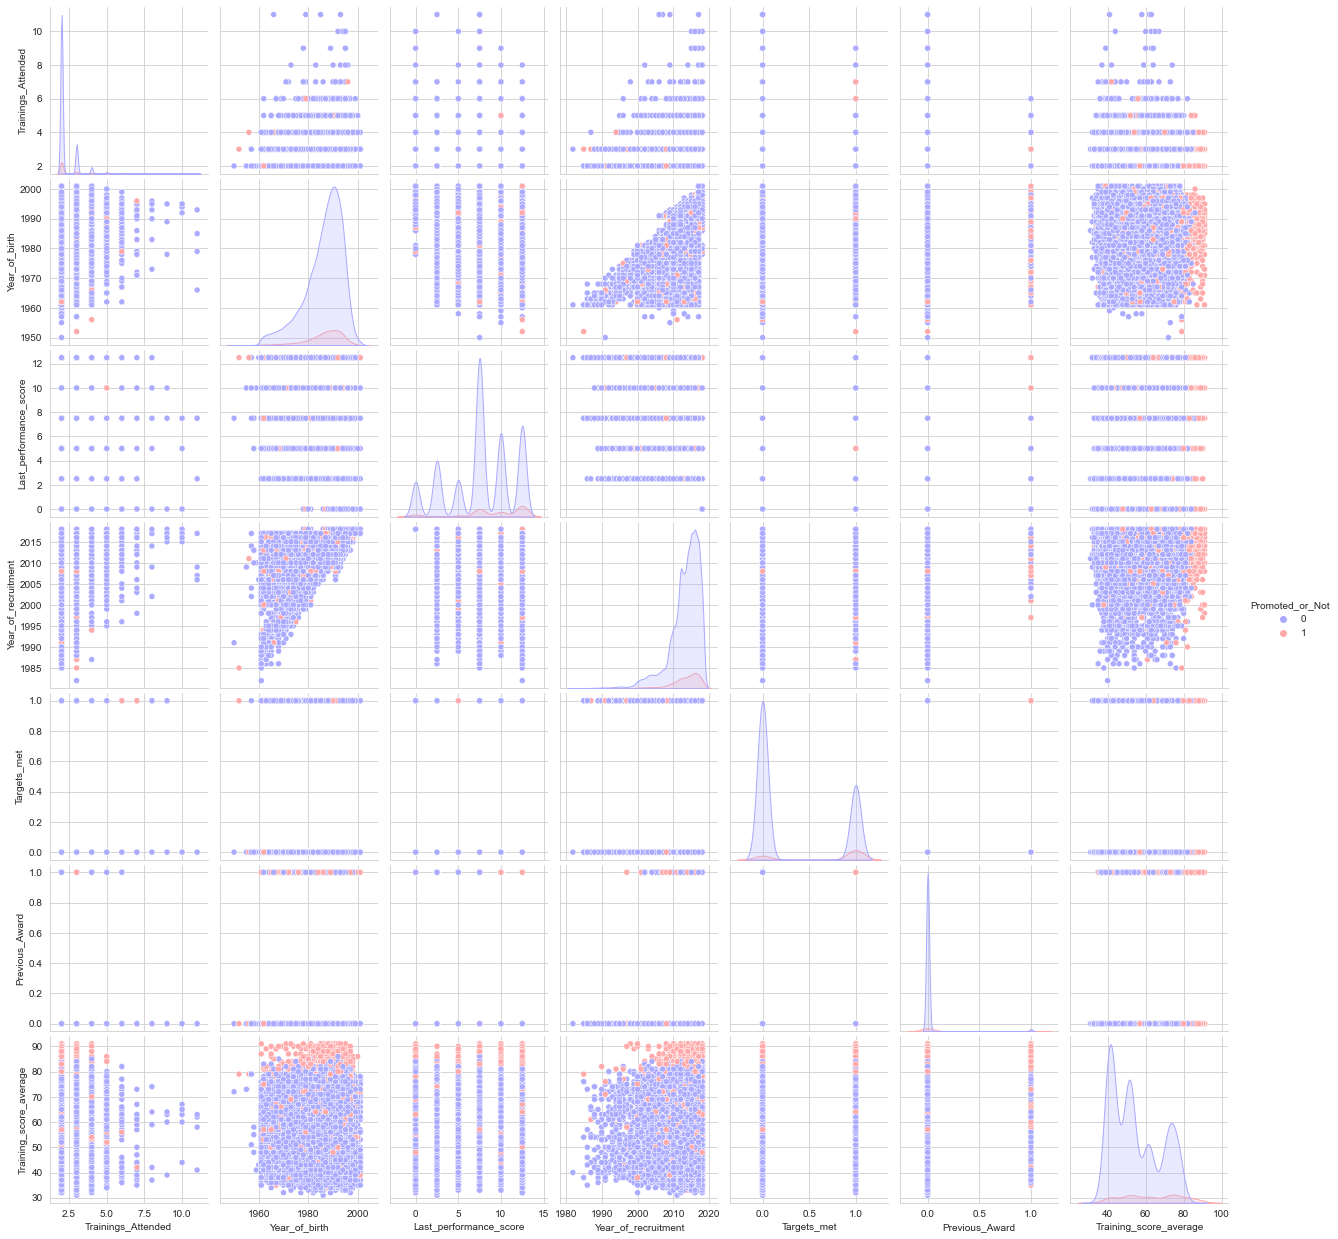

In [11]:
sns.pairplot(train,hue='Promoted_or_Not',palette='bwr')

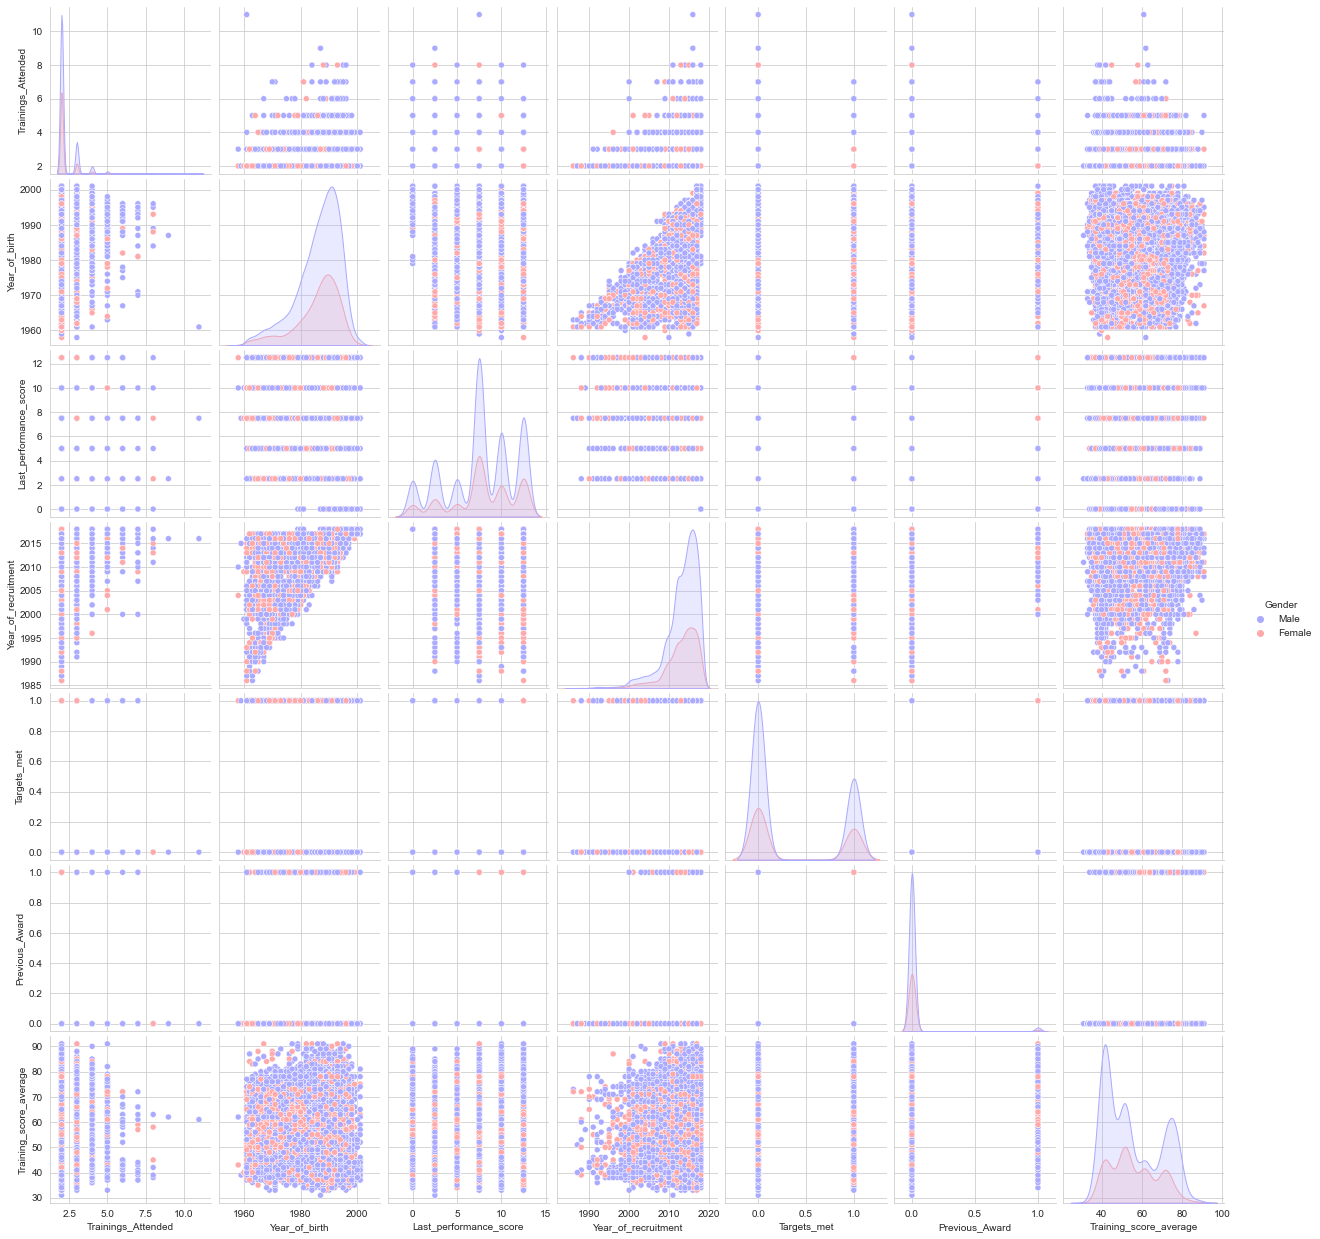

In [12]:
sns.pairplot(test,hue='Gender',palette='bwr')

<AxesSubplot:>

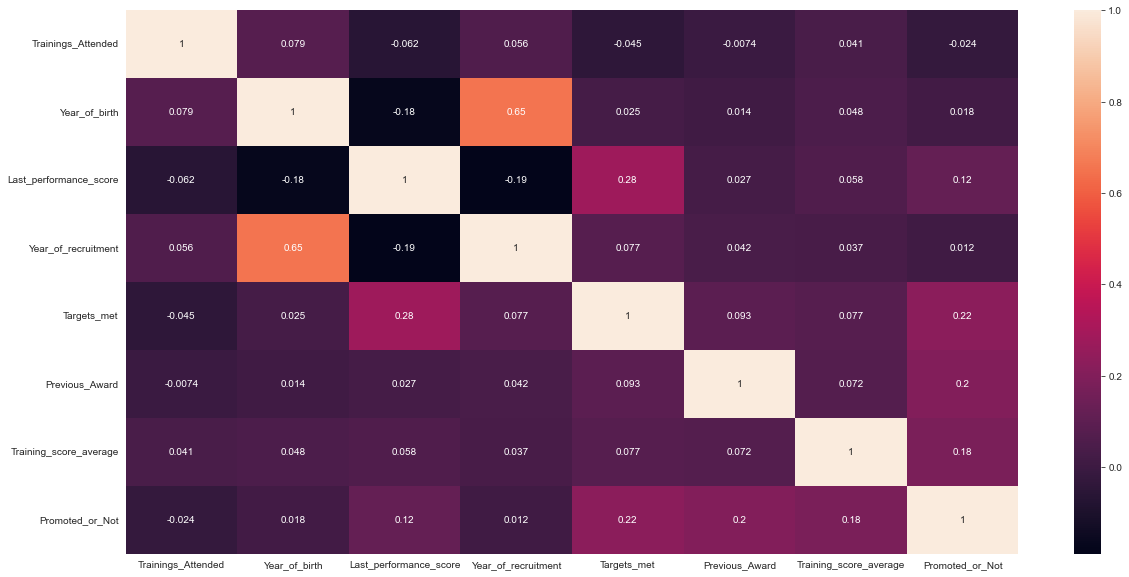

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),annot=True)

<AxesSubplot:>

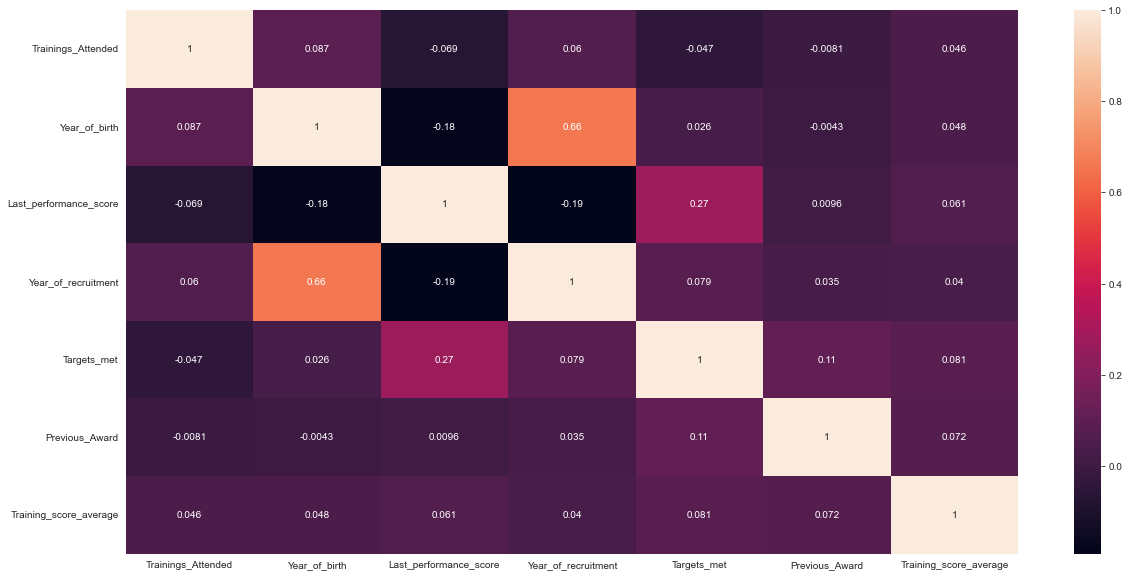

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(test.corr(),annot=True)

In [15]:
train['Qualification'].value_counts()
train['Qualification'].mode(0)
train['Qualification']=train['Qualification'].fillna(train['Qualification'].mode(0))

In [16]:
test['Qualification'].value_counts()
test['Qualification'].mode(0)
test['Qualification']=train['Qualification'].fillna(train['Qualification'].mode(0))

In [17]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Trainings_Attended,38312.0,2.253680,0.609443,2.0,2.0,2.0,2.0,11.0
Year_of_birth,38312.0,1986.209334,7.646047,1950.0,1982.0,1988.0,1992.0,2001.0
Last_performance_score,38312.0,7.698959,3.744135,0.0,5.0,7.5,10.0,12.5
Year_of_recruitment,38312.0,2013.139695,4.261451,1982.0,2012.0,2014.0,2016.0,2018.0
Targets_met,38312.0,0.352996,0.477908,0.0,0.0,0.0,1.0,1.0
Previous_Award,38312.0,0.023152,0.150388,0.0,0.0,0.0,0.0,1.0
Training_score_average,38312.0,55.366465,13.362741,31.0,43.0,52.0,68.0,91.0
Promoted_or_Not,38312.0,0.084595,0.278282,0.0,0.0,0.0,0.0,1.0


In [18]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Trainings_Attended,16496.0,2.251455,0.608865,2.0,2.0,2.0,2.0,11.0
Year_of_birth,16496.0,1986.161130,7.708188,1958.0,1982.0,1988.0,1992.0,2001.0
Last_performance_score,16496.0,7.692016,3.734303,0.0,5.0,7.5,10.0,12.5
Year_of_recruitment,16496.0,2013.122393,4.273649,1986.0,2011.0,2014.0,2016.0,2018.0
Targets_met,16496.0,0.349600,0.476858,0.0,0.0,0.0,1.0,1.0
Previous_Award,16496.0,0.023218,0.150599,0.0,0.0,0.0,0.0,1.0
Training_score_average,16496.0,55.433863,13.392306,31.0,43.0,52.0,68.0,91.0


In [19]:
train['Gender'] = train['Gender'].replace('Male', 0)
train['Gender'] = train['Gender'].replace('Female', 1)

In [20]:
test['Gender'] = test['Gender'].replace('Male', 0)
test['Gender'] = test['Gender'].replace('Female', 1)

In [21]:
train['Foreign_schooled'] = train['Foreign_schooled'].replace('Yes', 0)
train['Foreign_schooled'] = train['Foreign_schooled'].replace('No', 1)

In [22]:
test['Foreign_schooled'] = test['Foreign_schooled'].replace('Yes', 0)
test['Foreign_schooled'] = test['Foreign_schooled'].replace('No', 1)

In [23]:
test['Past_Disciplinary_Action'] = test['Past_Disciplinary_Action'].replace('Yes', 0)
test['Past_Disciplinary_Action'] = test['Past_Disciplinary_Action'].replace('No', 1)

In [24]:
train['Past_Disciplinary_Action'] = train['Past_Disciplinary_Action'].replace('Yes', 0)
train['Past_Disciplinary_Action'] = train['Past_Disciplinary_Action'].replace('No', 1)

In [25]:
train['Previous_IntraDepartmental_Movement'] = train['Previous_IntraDepartmental_Movement'].replace('Yes', 0)
train['Previous_IntraDepartmental_Movement'] = train['Previous_IntraDepartmental_Movement'].replace('No', 1)

In [26]:
test['Previous_IntraDepartmental_Movement'] = test['Previous_IntraDepartmental_Movement'].replace('Yes', 0)
test['Previous_IntraDepartmental_Movement'] = test['Previous_IntraDepartmental_Movement'].replace('No', 1)

In [27]:
train = pd.get_dummies(train, columns=['Qualification'], drop_first=True)

In [28]:
test = pd.get_dummies(test, columns=['Qualification'], drop_first=True)

In [29]:
test = pd.get_dummies(test, columns=['Division'], drop_first=True)

In [30]:
train = pd.get_dummies(train, columns=['Division'], drop_first=True)

In [31]:
train = pd.get_dummies(train, columns=['Channel_of_Recruitment'], drop_first=True)

In [32]:
test = pd.get_dummies(test, columns=['Channel_of_Recruitment'], drop_first=True)

In [33]:
train = pd.get_dummies(train, columns=['Marital_Status'], drop_first=True)

In [34]:
test = pd.get_dummies(test, columns=['Marital_Status'], drop_first=True)

In [35]:
train = pd.get_dummies(train, columns=['No_of_previous_employers'], drop_first=True)

In [36]:
test = pd.get_dummies(test, columns=['No_of_previous_employers'], drop_first=True)

In [37]:
train.head()

,EmployeeNo,Gender,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,...,Channel_of_Recruitment_Direct Internal process,Channel_of_Recruitment_Referral and Special candidates,Marital_Status_Not_Sure,Marital_Status_Single,No_of_previous_employers_1,No_of_previous_employers_2,No_of_previous_employers_3,No_of_previous_employers_4,No_of_previous_employers_5,No_of_previous_employers_More than 5
0,YAK/S/00001,1,2,1986,12.5,2011,1,0,41,ANAMBRA,...,1,0,0,0,0,0,0,0,0,0
1,YAK/S/00002,0,2,1991,12.5,2015,0,0,52,ANAMBRA,...,0,0,0,0,0,0,0,0,0,0
2,YAK/S/00003,0,2,1987,7.5,2012,0,0,42,KATSINA,...,1,0,0,0,0,0,0,0,0,0
3,YAK/S/00004,0,3,1982,2.5,2009,0,0,42,NIGER,...,0,0,0,1,1,0,0,0,0,0
4,YAK/S/00006,0,3,1990,7.5,2012,0,0,77,AKWA IBOM,...,1,0,0,0,1,0,0,0,0,0


In [38]:
test.drop(['EmployeeNo','State_Of_Origin',], axis=1, inplace=True)

In [39]:
train.drop(['EmployeeNo','State_Of_Origin',], axis=1, inplace=True)

In [40]:
EmployeeNo= test1['EmployeeNo']

In [41]:
X = train.drop('Promoted_or_Not', axis=1)

y = train['Promoted_or_Not']

In [42]:
from xgboost import XGBRegressor

In [43]:
xbg = XGBRegressor()

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [47]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [48]:
xbg.fit(X_train_scaled, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [49]:
y_pred = xbg.predict(X_test_scaled)

In [50]:
y_pred

array([ 0.34184524,  0.17336193, -0.00421803, ...,  0.13837038,
        0.17601873,  0.00978266], dtype=float32)

In [51]:
print(metrics.r2_score(y_test, y_pred))

0.33558872400144224


In [52]:
Final_test_xgb = xbg.predict(test)

In [53]:
Final_test_xgb

array([0.7941231, 0.8672772, 0.8252519, ..., 0.9601232, 0.8943806,
       0.8252519], dtype=float32)

In [54]:
xgb_Final_test_re = pd.DataFrame({'EmployeeNo':EmployeeNo,'Promoted_or_Not':Final_test_xgb}) 

In [55]:
xgb_Final_test_re.head(5)

,EmployeeNo,Promoted_or_Not
0,YAK/S/00005,0.794123
1,YAK/S/00011,0.867277
2,YAK/S/00015,0.825252
3,YAK/S/00016,0.861044
4,YAK/S/00017,0.761645


In [56]:
###xgb_Final_test_re.to_csv('xgb_Final_test.csv')